In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D
import seaborn as sns
import glob
from scipy.io import loadmat
import plotly.express as px

# Load Khalid's Centromere Data

In [2]:
WT_STRAINS = ['YV3670', 'YV3671', 'YV3701', 'YV3657']
ASE17A_Tub4_Y445D_STRAINS = ['YV3808', 'YV3811', 'YV3810', 'YV3812', 'YV3809']
WINDOW_SIZE = 9

def load_centromere_data(path) -> pd.DataFrame: 
    df = pd.read_csv(path)
    
    result_df = pd.DataFrame({
        'Centromere Separation': df['Centromere Separation (Gaussian)'], 
        'Spindle Length': df['Spindle Length'],
        'Mean Centromere Separation': df['Centromere Separation (Gaussian)'].rolling(window=WINDOW_SIZE, min_periods=2).mean(),
        'Variance Centromere Separation': df['Centromere Separation (Gaussian)'].rolling(window=WINDOW_SIZE, min_periods=2).mean(),
        'Mean Spindle Length': df['Spindle Length'].rolling(window=WINDOW_SIZE, min_periods=2).mean(),
        'Variance Spindle Length': df['Spindle Length'].rolling(window=WINDOW_SIZE, min_periods=2).var()
    })
    
    result_df['Dispersion Spindle Length'] = result_df['Variance Spindle Length'] / result_df['Mean Spindle Length']
    
    return result_df

In [3]:
wt_dataframes = [] 
for strain in WT_STRAINS: 
    paths = glob.glob(f'./data/Centromere Separation Data/{strain}/*.csv')
    for path in paths: 
        wt_dataframes.append(load_centromere_data(path))

wt_data = pd.concat(wt_dataframes)
        
print(f'{len(wt_dataframes)} wild type cells loaded')

51 wild type cells loaded


In [4]:
wt_data.dropna()

,Centromere Separation,Spindle Length,Mean Centromere Separation,Variance Centromere Separation,Mean Spindle Length,Variance Spindle Length,Dispersion Spindle Length
21,0.506719,0.845833,0.459627,0.459627,0.889482,0.021091,0.023712
22,0.623453,1.239778,0.514236,0.514236,0.959542,0.040360,0.042062
23,0.053551,1.153551,0.399065,0.399065,0.991877,0.038561,0.038877
24,0.397054,1.133548,0.398663,0.398663,1.012115,0.035002,0.034583
25,0.716060,0.890095,0.451562,0.451562,0.996863,0.031863,0.031963
...,...,...,...,...,...,...,...
34,0.008215,1.608618,0.167263,0.167263,1.210357,0.074698,0.061716
35,0.158335,1.118034,0.143647,0.143647,1.250031,0.052685,0.042147
37,0.044153,1.308240,0.130122,0.130122,1.237711,0.049689,0.040146
38,0.118373,1.242706,0.138093,0.138093,1.238425,0.041411,0.033439


In [5]:
ase17a_tub4_Y445D_dataframes = [] 
for strain in ASE17A_Tub4_Y445D_STRAINS: 
    paths = glob.glob(f'./data/Centromere Separation Data/{strain}/*.csv')
    for path in paths: 
        ase17a_tub4_Y445D_dataframes.append(load_centromere_data(path))

ase17a_tub4_Y445D_data = pd.concat(ase17a_tub4_Y445D_dataframes)
        
print(f'{len(ase17a_tub4_Y445D_dataframes)} mutant cells loaded')

51 mutant cells loaded


In [6]:
ase17a_tub4_Y445D_data.dropna()

,Centromere Separation,Spindle Length,Mean Centromere Separation,Variance Centromere Separation,Mean Spindle Length,Variance Spindle Length,Dispersion Spindle Length
1,1.305725,1.397440,1.010751,1.010751,1.313308,0.014157,0.010779
2,1.022122,1.338471,1.014541,1.014541,1.321696,0.007289,0.005515
3,0.679117,1.375919,0.930685,0.930685,1.335252,0.005595,0.004190
4,0.614447,1.378766,0.867438,0.867438,1.343954,0.004575,0.003404
5,0.819583,1.695130,0.859462,0.859462,1.402484,0.024214,0.017265
...,...,...,...,...,...,...,...
54,0.290599,1.402204,0.351379,0.351379,1.495123,0.030844,0.020630
55,0.139728,1.716122,0.357035,0.357035,1.548358,0.025433,0.016426
56,0.262610,1.732922,0.366862,0.366862,1.582071,0.026646,0.016843
57,0.614487,1.618688,0.366520,0.366520,1.599860,0.024552,0.015346


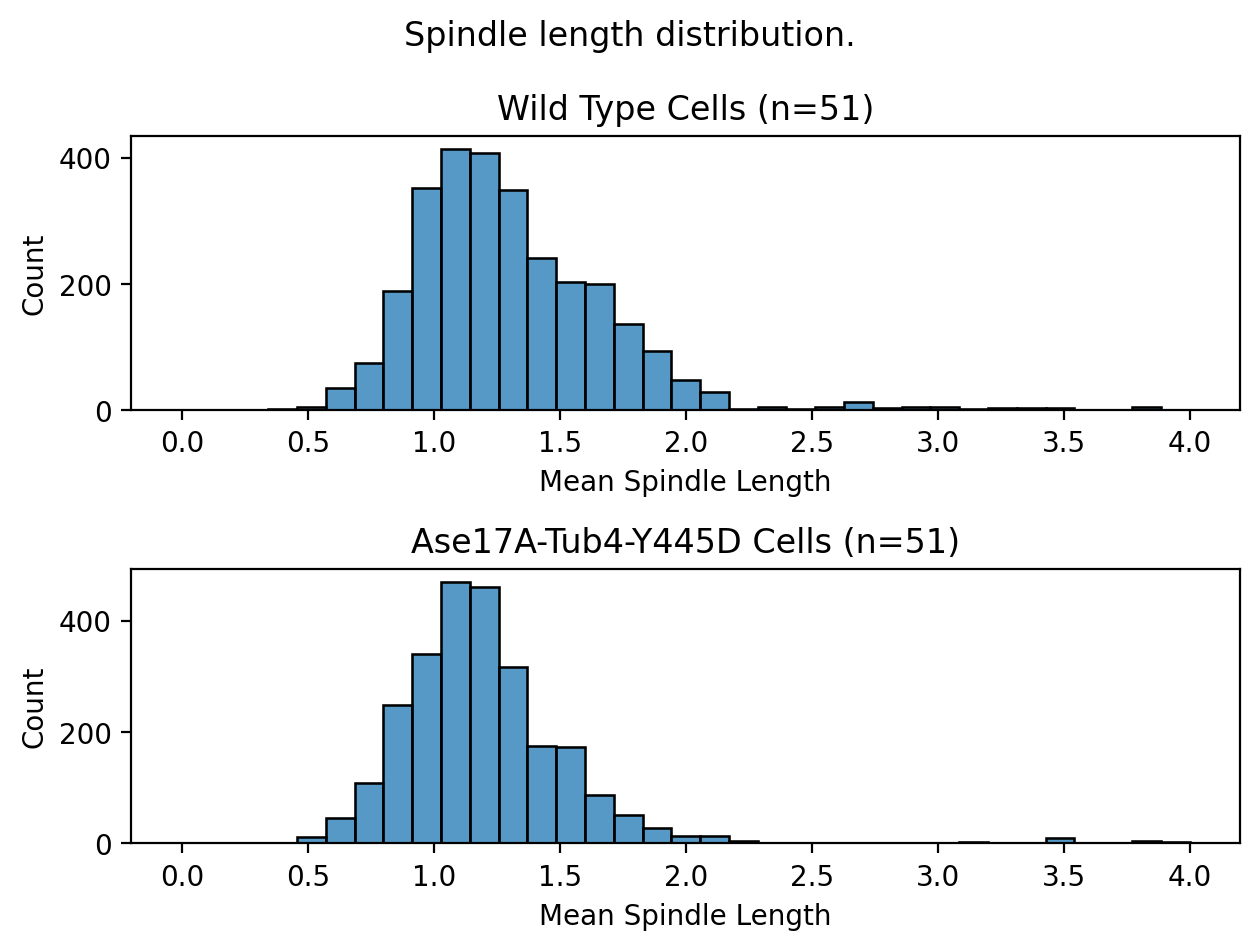

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=1, dpi=200, facecolor='white')

sns.histplot(wt_data['Mean Spindle Length'], ax=axs[0], bins=35, binrange=(0, 4))
sns.histplot(ase17a_tub4_Y445D_data['Mean Spindle Length'], ax=axs[1], bins=35, binrange=(0, 4))

axs[0].set_title(f'Wild Type Cells (n={len(wt_dataframes)})')
axs[1].set_title(f'Ase17A-Tub4-Y445D Cells (n={len(ase17a_tub4_Y445D_dataframes)})')

fig.suptitle("Spindle length distribution.")
plt.tight_layout()

# Load Shannon's Data

In [8]:
wild_type_spindle_paths = glob.glob("./data/Individual workspaces WT/WT*.mat")
Y445D_spindle_paths = glob.glob('./data/Shannon Ase1/Y445D/Individual workspaces/*.mat')

def load_spindle_data(path, data_length=100) -> pd.DataFrame: 
    spindle_length_mat = loadmat(path)['Spindle_length']
    
    length_values = spindle_length_mat[:, 0]
    frame_index = spindle_length_mat[:, 2]

    spindle_length = np.zeros(data_length)
    spindle_length[:] = np.nan

    for l, f in zip(length_values, frame_index):
        spindle_length[int(f)] = l
    
    spindle_length = pd.Series(spindle_length)
    
    sl_mean = spindle_length.rolling(window=WINDOW_SIZE*2, min_periods=2).mean().dropna()
    sl_var = spindle_length.rolling(window=WINDOW_SIZE*2, min_periods=2).var().dropna()
    
    result_df = pd.DataFrame({
        "Spindle Length Mean": sl_mean, 
        "Spindle Length Dispersion": sl_var/sl_mean
    })
    
    return result_df

In [9]:
wild_type_spindle_dataframes = []
for path in wild_type_spindle_paths: 
    wild_type_spindle_dataframes.append(load_spindle_data(path))

wild_type_spindle_data = pd.concat(wild_type_spindle_dataframes)

print(f'{len(wild_type_spindle_dataframes)} wild type cells loaded')
wild_type_spindle_data.dropna()

57 wild type cells loaded


,Spindle Length Mean,Spindle Length Dispersion
1,1.179307,0.000042
2,1.147335,0.002695
3,1.149661,0.001812
4,1.150128,0.001359
5,1.163157,0.001951
...,...,...
72,1.448765,0.006819
73,1.440181,0.008191
74,1.446636,0.010680
75,1.467003,0.014101


In [10]:
Y445D_spindle_dataframes = []
for path in Y445D_spindle_paths: 
    Y445D_spindle_dataframes.append(load_spindle_data(path))

Y445D_spindle_data = pd.concat(Y445D_spindle_dataframes)

print(f'{len(Y445D_spindle_dataframes)} mutant cells loaded')
Y445D_spindle_data.dropna()

51 mutant cells loaded


,Spindle Length Mean,Spindle Length Dispersion
1,1.463127,0.005465
2,1.359315,0.026726
3,1.203249,0.101097
4,1.114600,0.117106
5,1.071055,0.108117
...,...,...
67,0.903965,0.031424
68,0.944234,0.028662
69,0.944234,0.028662
70,1.004702,0.018570


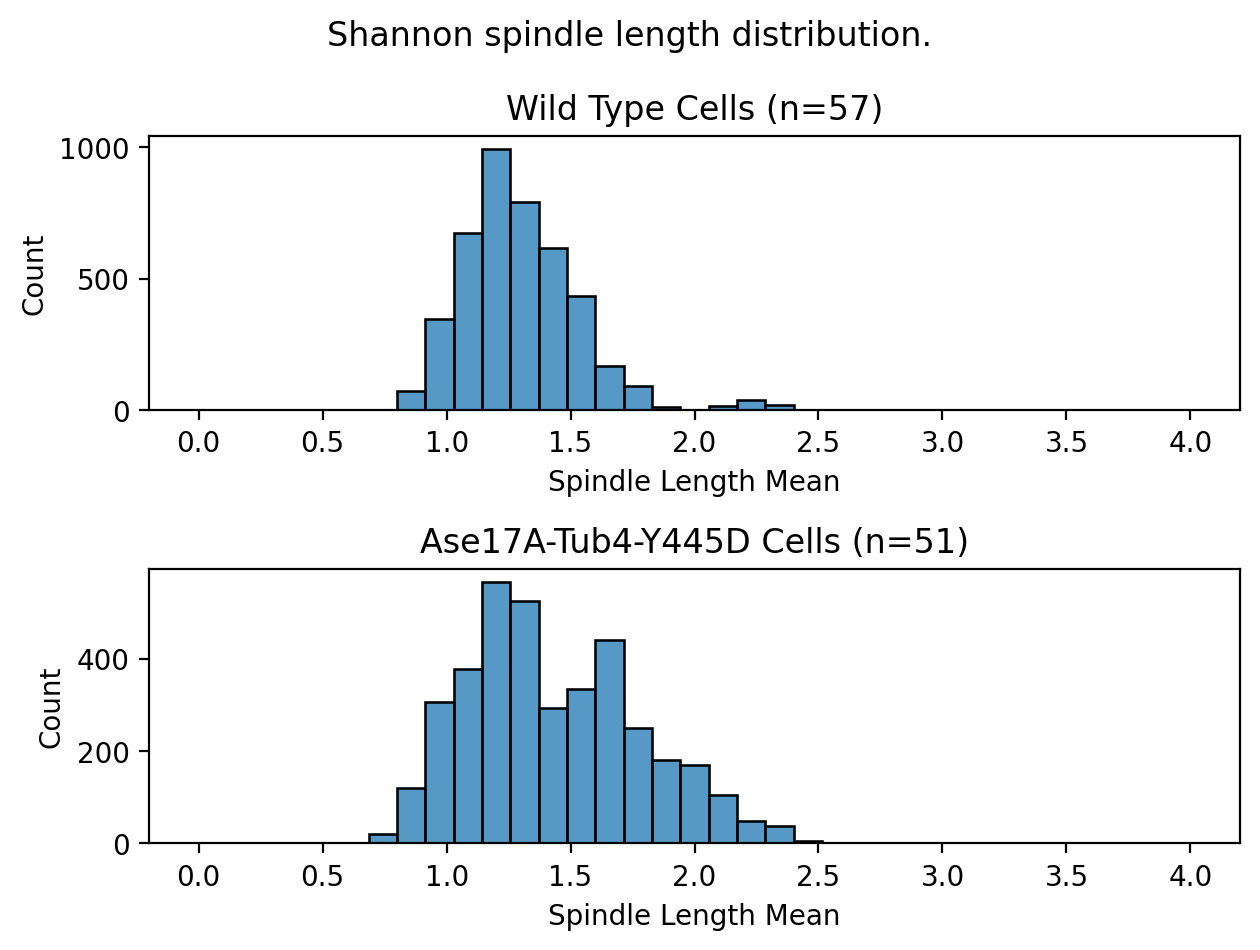

In [11]:
fig, axs = plt.subplots(nrows=2, ncols=1, dpi=200, facecolor='white')

sns.histplot(wild_type_spindle_data['Spindle Length Mean'], ax=axs[0], bins=35, binrange=(0, 4))
sns.histplot(Y445D_spindle_data['Spindle Length Mean'], ax=axs[1], bins=35, binrange=(0, 4))

axs[0].set_title(f'Wild Type Cells (n={len(wild_type_spindle_dataframes)})')
axs[1].set_title(f'Ase17A-Tub4-Y445D Cells (n={len(Y445D_spindle_dataframes)})')

fig.suptitle("Shannon spindle length distribution.")
plt.tight_layout()

<Axes: xlabel='Spindle Length Mean', ylabel='Count'>

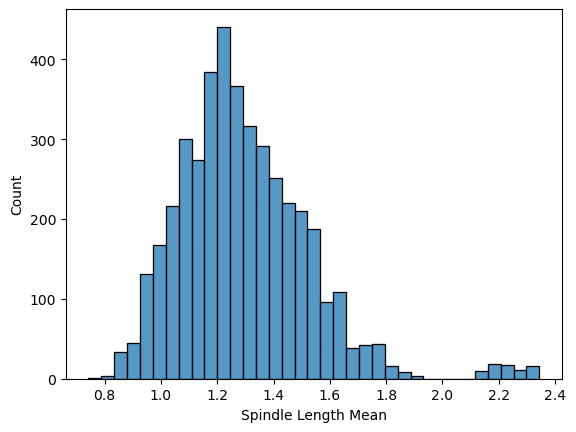

In [12]:
sns.histplot(wild_type_spindle_data['Spindle Length Mean'], bins=35)

<Axes: xlabel='Spindle Length Mean', ylabel='Count'>

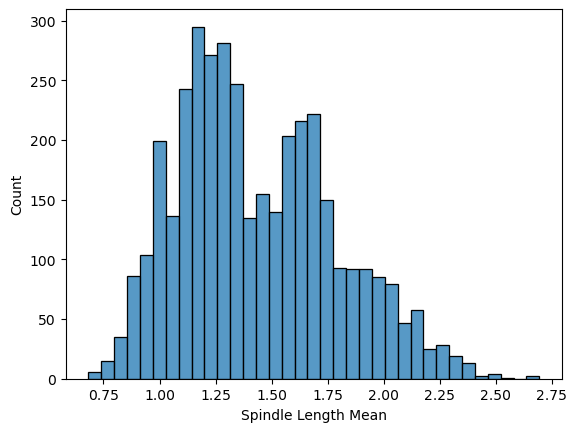

In [13]:
sns.histplot(Y445D_spindle_data['Spindle Length Mean'], bins=35)

# Plot the data together. 

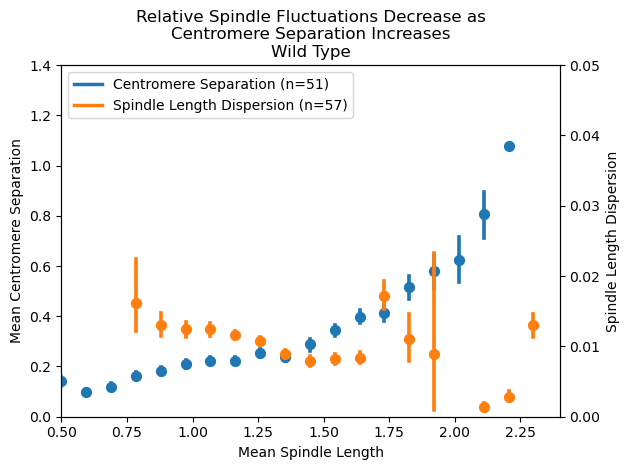

In [14]:
plt.figure(dpi=100)

ax1 = plt.gca()
ax2 = ax1.twinx()

bins = np.linspace(0.5, 2.3, 20)

# Plot Centromere Data
sns.regplot(
    x=wt_data['Mean Spindle Length'], 
    y=wt_data['Mean Centromere Separation'], 
    x_bins=bins,
    ax=ax1, 
    color=sns.color_palette()[0],
    label="Centromere",
    fit_reg=False
)

# Plot the Spwildindle Dispersion Data 
sns.regplot(
    x=wild_type_spindle_data['Spindle Length Mean'], 
    y=wild_type_spindle_data['Spindle Length Dispersion'], 
    x_bins=bins,
    ax=ax2,
    color=sns.color_palette()[1],
    label="Spindle",
    fit_reg=False
)

ax1.set_xlim(0.5, 2.4)
ax2.set_ylim(0, 0.05)
ax1.set_ylim(0, 1.4)

lns = [
    Line2D([0], [0], color=sns.color_palette()[0], lw=2.5),
    Line2D([0], [0], color=sns.color_palette()[1], lw=2.5)]
labs = [f'Centromere Separation (n={len(wt_dataframes)})', f'Spindle Length Dispersion (n={len(wild_type_spindle_dataframes)})']
ax2.legend(lns, labs, loc='upper left')

plt.title("Relative Spindle Fluctuations Decrease as\nCentromere Separation Increases\nWild Type")
plt.tight_layout()
plt.savefig("wildtype.png", dpi=300, facecolor="white")

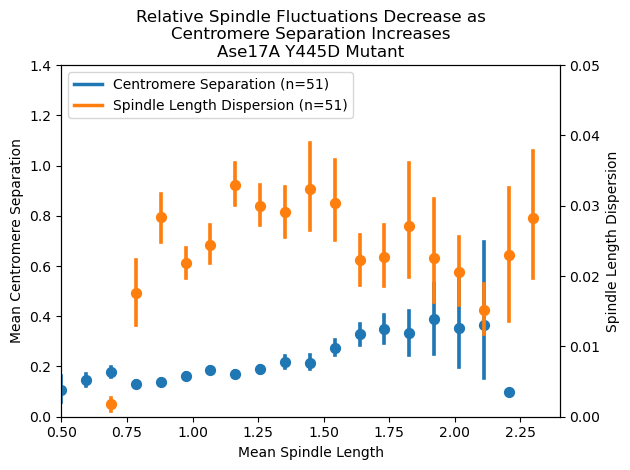

In [15]:
plt.figure(dpi=100)

ax1 = plt.gca()
ax2 = ax1.twinx()

bins = np.linspace(0.5, 2.3, 20)

# Plot Centromere Data
sns.regplot(
    x=ase17a_tub4_Y445D_data['Mean Spindle Length'], 
    y=ase17a_tub4_Y445D_data['Mean Centromere Separation'], 
    x_bins=bins,
    ax=ax1, 
    color=sns.color_palette()[0],
    label="Centromere",
    fit_reg=False
)

# Plot the Spindle Dispersion Data 
sns.regplot(
    x=Y445D_spindle_data['Spindle Length Mean'], 
    y=Y445D_spindle_data['Spindle Length Dispersion'], 
    x_bins=bins,
    ax=ax2,
    color=sns.color_palette()[1],
    label="Spindle",
    fit_reg=False
)

ax1.set_xlim(0.5, 2.4)
ax2.set_ylim(0, 0.05)
ax1.set_ylim(0, 1.4)

lns = [
    Line2D([0], [0], color=sns.color_palette()[0], lw=2.5),
    Line2D([0], [0], color=sns.color_palette()[1], lw=2.5)]
labs = [f'Centromere Separation (n={len(ase17a_tub4_Y445D_dataframes)})', f'Spindle Length Dispersion (n={len(Y445D_spindle_dataframes)})']
ax2.legend(lns, labs, loc='upper left')

plt.title("Relative Spindle Fluctuations Decrease as\nCentromere Separation Increases\nAse17A Y445D Mutant")
plt.tight_layout()
plt.savefig("ase17a_Y445D.png", dpi=300, facecolor="white")

# With only Khalid's Data

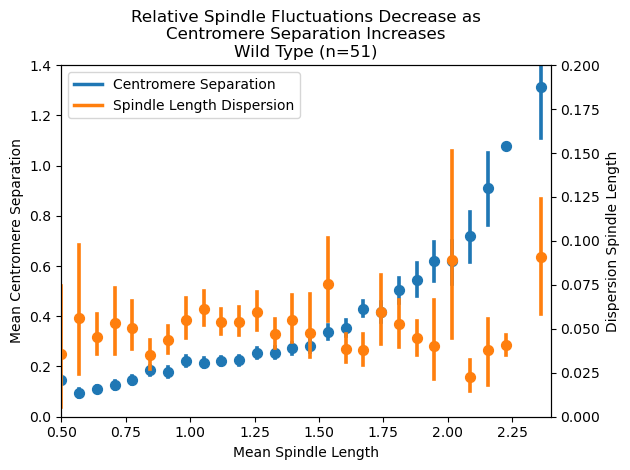

In [16]:
plt.figure(dpi=100)

ax1 = plt.gca()
ax2 = ax1.twinx()

bins = np.linspace(0.5, 2.5, 30)

# Plot Centromere Data
sns.regplot(
    x=wt_data['Mean Spindle Length'], 
    y=wt_data['Mean Centromere Separation'], 
    fit_reg=False,
    robust=True,
    x_bins=bins,
    ax=ax1, 
    color=sns.color_palette()[0],
    label="Centromere",
)

# Plot the Spindle Dispersion Data 
sns.regplot(
    x=wt_data['Mean Spindle Length'], 
    y=wt_data['Dispersion Spindle Length'], 
    fit_reg=False,
    robust=True,
    x_bins=bins,
    ax=ax2,
    color=sns.color_palette()[1],
    label="Spindle",
)

ax1.set_xlim(0.5, 2.4)
ax2.set_ylim(0, 0.2)
ax1.set_ylim(0, 1.4)

lns = [
    Line2D([0], [0], color=sns.color_palette()[0], lw=2.5),
    Line2D([0], [0], color=sns.color_palette()[1], lw=2.5)]
labs = [f'Centromere Separation', f'Spindle Length Dispersion']
ax2.legend(lns, labs, loc='upper left')

plt.title(f"Relative Spindle Fluctuations Decrease as\nCentromere Separation Increases\nWild Type (n={len(wt_dataframes)})")
plt.tight_layout()
plt.savefig("wt_khalid_only.png", dpi=300, facecolor="white")
plt.savefig("wt_khalid_only.svg", dpi=300, facecolor="white")

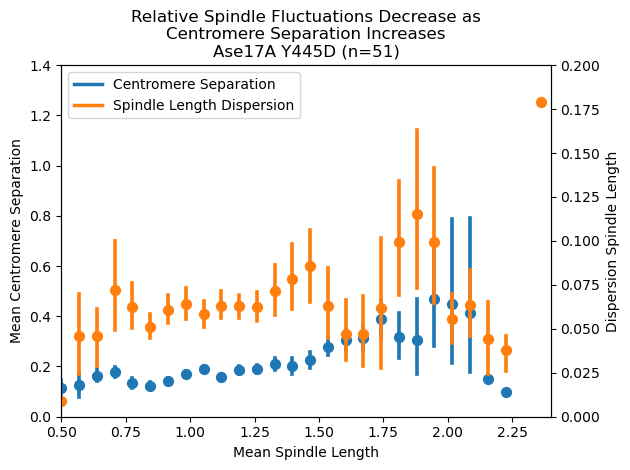

In [17]:
plt.figure(dpi=100)

ax1 = plt.gca()
ax2 = ax1.twinx()

bins = np.linspace(0.5, 2.5, 30)

# Plot Centromere Data
sns.regplot(
    x=ase17a_tub4_Y445D_data['Mean Spindle Length'], 
    y=ase17a_tub4_Y445D_data['Mean Centromere Separation'], 
    fit_reg=False,
    robust=True,
    x_bins=bins,
    ax=ax1, 
    color=sns.color_palette()[0],
    label="Centromere"
)

# Plot the Spindle Dispersion Data 
sns.regplot(
    x=ase17a_tub4_Y445D_data['Mean Spindle Length'], 
    y=ase17a_tub4_Y445D_data['Dispersion Spindle Length'], 
    fit_reg=False,
    robust=True,
    x_bins=bins,
    ax=ax2,
    color=sns.color_palette()[1],
    label="Spindle"
)

ax1.set_xlim(0.5, 2.4)
ax2.set_ylim(0, 0.2)
ax1.set_ylim(0, 1.4)

lns = [
    Line2D([0], [0], color=sns.color_palette()[0], lw=2.5),
    Line2D([0], [0], color=sns.color_palette()[1], lw=2.5)]
labs = [f'Centromere Separation', f'Spindle Length Dispersion']
ax2.legend(lns, labs, loc='upper left')

plt.title(f"Relative Spindle Fluctuations Decrease as\nCentromere Separation Increases\nAse17A Y445D (n={len(ase17a_tub4_Y445D_dataframes)})")
plt.tight_layout()
plt.savefig("ase17a_Y445D_khalid_only.png", dpi=300, facecolor="white")
plt.savefig("ase17a_Y445D_khalid_only.svg", dpi=300, facecolor="white")

# Plot the centromere data against itself. 

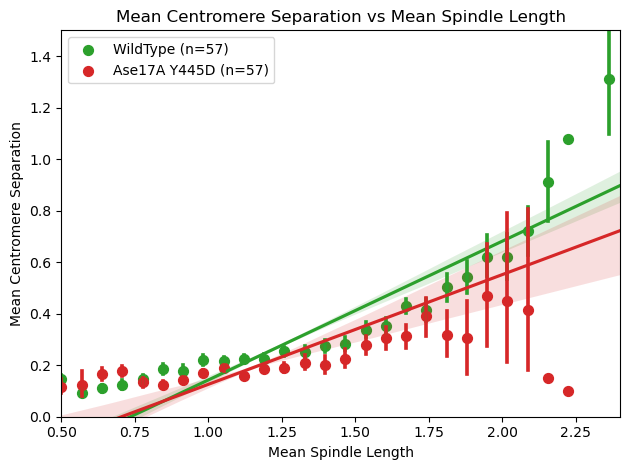

In [18]:
plt.figure(dpi=100)

bins = np.linspace(0.5, 2.5, 30)

sns.regplot(
    x=wt_data['Mean Spindle Length'], 
    y=wt_data['Mean Centromere Separation'], 
    fit_reg=True,
    robust=False,
    x_bins=bins,
    color=sns.color_palette()[2],
    label=f"WildType (n={len(wild_type_spindle_dataframes)})"
)

# Plot the Spindle Dispersion Data 
sns.regplot(
    x=ase17a_tub4_Y445D_data['Mean Spindle Length'], 
    y=ase17a_tub4_Y445D_data['Mean Centromere Separation'], 
    fit_reg=True,
    robust=False,
    x_bins=bins,
    color=sns.color_palette()[3],
    label=f"Ase17A Y445D (n={len(wild_type_spindle_dataframes)})",
)

plt.gca().set_xlim(0.5, 2.4)
plt.gca().set_ylim(0, 1.5)
plt.legend()
plt.title("Mean Centromere Separation vs Mean Spindle Length")
plt.tight_layout()
plt.savefig("centromere_only.png", dpi=300)

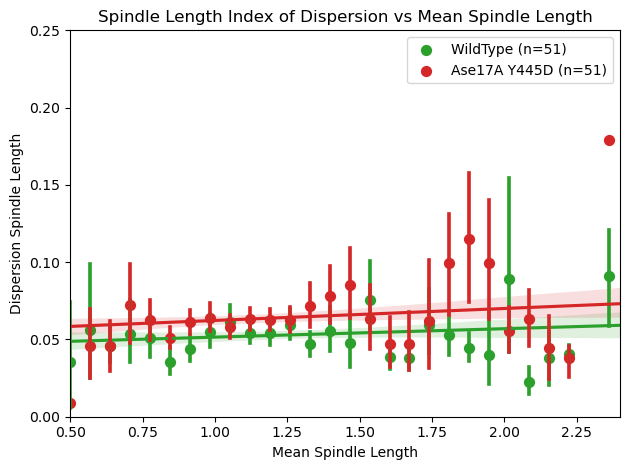

In [19]:
plt.figure(dpi=100)

bins = np.linspace(0.5, 2.5, 30)

sns.regplot(
    x=wt_data['Mean Spindle Length'], 
    y=wt_data['Dispersion Spindle Length'], 
    fit_reg=True,
    robust=False,
    x_bins=bins,
    color=sns.color_palette()[2],
    label=f"WildType (n={len(ase17a_tub4_Y445D_dataframes)})"
)

# Plot the Spindle Dispersion Data 
sns.regplot(
    x=ase17a_tub4_Y445D_data['Mean Spindle Length'], 
    y=ase17a_tub4_Y445D_data['Dispersion Spindle Length'], 
    fit_reg=True,
    robust=False,
    x_bins=bins,
    color=sns.color_palette()[3],
    label=f"Ase17A Y445D (n={len(ase17a_tub4_Y445D_dataframes)})",
)

plt.gca().set_xlim(0.5, 2.4)
plt.gca().set_ylim(0, 0.25)
plt.legend()
plt.title("Spindle Length Index of Dispersion vs Mean Spindle Length")
plt.tight_layout()
plt.savefig("dispersion_only.png", dpi=300)

# Combine Shannon and Khalid's datasets for the spindle lengths. 

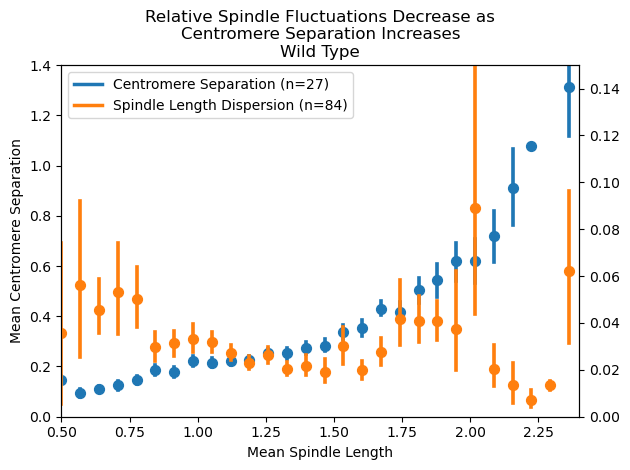

In [20]:
plt.figure(dpi=100)

ax1 = plt.gca()
ax2 = ax1.twinx()

bins = np.linspace(0.5, 2.5, 30)

# Plot Centromere Data
sns.regplot(
    x=wt_data['Mean Spindle Length'], 
    y=wt_data['Mean Centromere Separation'], 
    fit_reg=False,
    robust=False,
    x_bins=bins,
    ax=ax1, 
    color=sns.color_palette()[0],
    label="Centromere"
)

# Plot the Spindle Dispersion Data 
sns.regplot(
    x=pd.concat([wt_data['Mean Spindle Length'], wild_type_spindle_data['Spindle Length Mean']]), 
    y=pd.concat([wt_data['Dispersion Spindle Length'], wild_type_spindle_data['Spindle Length Dispersion']]), 
    fit_reg=False,
    robust=False,
    x_bins=bins,
    ax=ax2,
    color=sns.color_palette()[1],
    label="Spindle"
)

ax1.set_xlim(0.5, 2.4)
ax2.set_ylim(0, 0.15)
ax1.set_ylim(0, 1.4)

lns = [
    Line2D([0], [0], color=sns.color_palette()[0], lw=2.5),
    Line2D([0], [0], color=sns.color_palette()[1], lw=2.5)]
labs = [f'Centromere Separation (n=27)', f'Spindle Length Dispersion (n=84)']
ax2.legend(lns, labs, loc='upper left')

plt.title(f"Relative Spindle Fluctuations Decrease as\nCentromere Separation Increases\nWild Type")
plt.tight_layout()
plt.savefig("wt_combined.png", dpi=300, facecolor="white")

[0.5        0.56896552 0.63793103 0.70689655 0.77586207 0.84482759
 0.9137931  0.98275862 1.05172414 1.12068966 1.18965517 1.25862069
 1.32758621 1.39655172 1.46551724 1.53448276 1.60344828 1.67241379
 1.74137931 1.81034483 1.87931034 1.94827586 2.01724138 2.0862069
 2.15517241 2.22413793 2.29310345 2.36206897 2.43103448 2.5       ]
0.06896551724137934


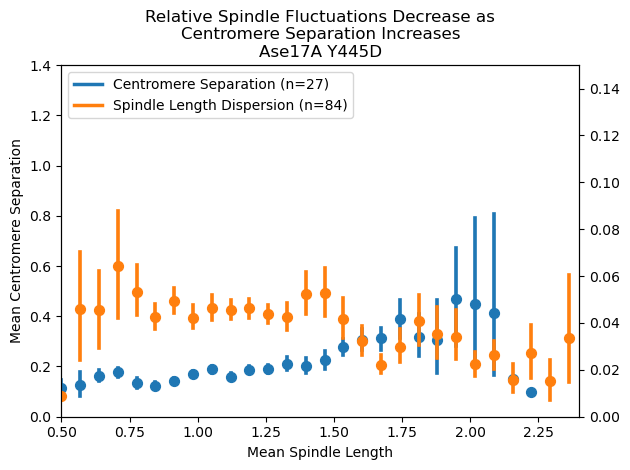

In [21]:
plt.figure(dpi=100)

ax1 = plt.gca()
ax2 = ax1.twinx()

bins = np.linspace(0.5, 2.5, 30)

# Plot Centromere Data
sns.regplot(
    x=ase17a_tub4_Y445D_data['Mean Spindle Length'], 
    y=ase17a_tub4_Y445D_data['Mean Centromere Separation'], 
    fit_reg=False,
    robust=False,
    x_bins=bins,
    ax=ax1, 
    color=sns.color_palette()[0],
    label="Centromere"
)

# Plot the Spindle Dispersion Data 
sns.regplot(
    x=pd.concat([ase17a_tub4_Y445D_data['Mean Spindle Length'], Y445D_spindle_data['Spindle Length Mean']]), 
    y=pd.concat([ase17a_tub4_Y445D_data['Dispersion Spindle Length'], Y445D_spindle_data['Spindle Length Dispersion']]), 
    fit_reg=False,
    robust=False,
    x_bins=bins,
    ax=ax2,
    color=sns.color_palette()[1],
    label="Spindle"
)

ax1.set_xlim(0.5, 2.4)
ax2.set_ylim(0, 0.15)
ax1.set_ylim(0, 1.4)

lns = [
    Line2D([0], [0], color=sns.color_palette()[0], lw=2.5),
    Line2D([0], [0], color=sns.color_palette()[1], lw=2.5)]
labs = [f'Centromere Separation (n=27)', f'Spindle Length Dispersion (n=84)']
ax2.legend(lns, labs, loc='upper left')

plt.title(f"Relative Spindle Fluctuations Decrease as\nCentromere Separation Increases\nAse17A Y445D")
plt.tight_layout()
plt.savefig("ase17a_Y445D_combined.png", dpi=300, facecolor="white")

print(bins)
print(bins[1] - bins[0])

BINS: 28


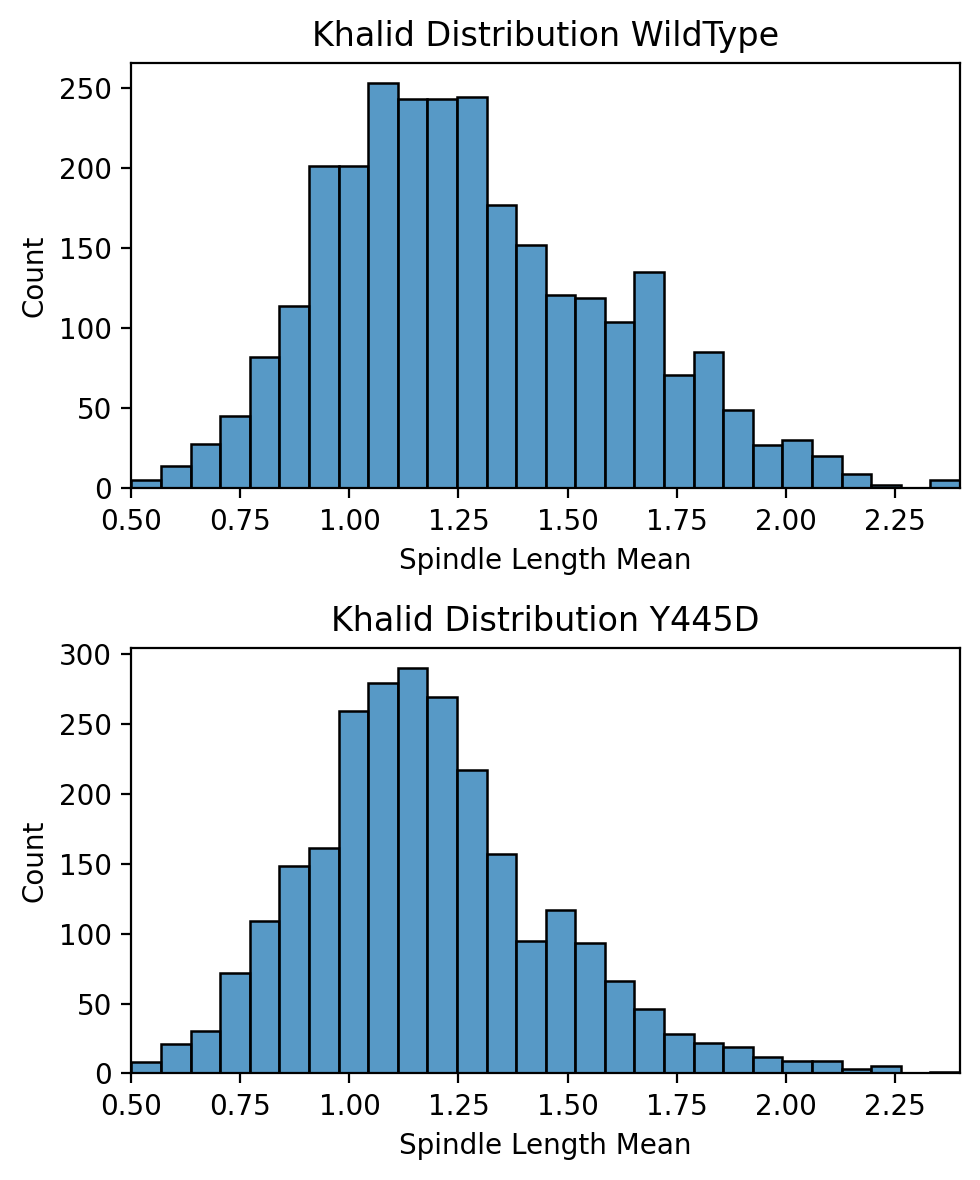

In [22]:
fig, axs = plt.subplots(nrows=2, ncols=1, facecolor="white", dpi=200, figsize=(5,6))

num_observations = len(wild_type_spindle_data['Spindle Length Mean'].index)
BINS = int(1 + 3.322*np.log(num_observations))
print("BINS:", BINS)
BINRANGE = (0.5, 2.4)

# sns.histplot(wild_type_spindle_data['Spindle Length Mean'], ax=axs[0,0], bins=BINS, binrange=BINRANGE)
# axs[0,0].set_title("Shannon Distribution WildType")

# sns.histplot(Y445D_spindle_data['Spindle Length Mean'], ax=axs[0,1], bins=BINS, binrange=BINRANGE)
# axs[0,1].set_title("Shannon Distribution Y445D")

sns.histplot(wt_data['Mean Spindle Length'], ax=axs[0], bins=BINS, binrange=BINRANGE)
axs[0].set_title("Khalid Distribution WildType")

sns.histplot(ase17a_tub4_Y445D_data['Mean Spindle Length'], ax=axs[1], bins=BINS, binrange=BINRANGE)
axs[1].set_title("Khalid Distribution Y445D")

for ax in axs.flatten(): 
    ax.set_xlabel("Spindle Length Mean")
    ax.set_xlim(0.5, 2.4)

plt.tight_layout()
plt.savefig('spindle distribution.png', facecolor='white', dpi=300)
plt.savefig('spindle distribution.svg', facecolor='white', dpi=300)

# Plot with only Khalid's Data using Time as our X Variable

In [23]:
wt_dataframes[0]

,Centromere Separation,Spindle Length,Mean Centromere Separation,Variance Centromere Separation,Mean Spindle Length,Variance Spindle Length,Dispersion Spindle Length
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
56,0.341486,0.819958,0.250627,0.250627,0.834912,0.019825,0.023745
57,0.367395,0.757765,0.281800,0.281800,0.856902,0.010974,0.012806
58,0.505312,0.870313,0.326687,0.326687,0.842333,0.008344,0.009906
59,0.587362,0.907786,0.377281,0.377281,0.835574,0.006863,0.008213


In [24]:
wt_time_dataframes = [] 
for df in wt_dataframes:
    # Establish the start point. 
    start = 0
    spindle_length = np.array(df['Spindle Length'])
    centromere_separation = np.array(df['Centromere Separation'])
    while np.isnan(spindle_length)[start]: 
        start += 1 
    
    df = pd.DataFrame({
        'Spindle Length': spindle_length[start:],
        'Centromere Separation': centromere_separation[start:]
    })
    
    df['Mean Centromere Separation'] = df['Centromere Separation'].rolling(window=WINDOW_SIZE, min_periods=2).mean()
    df['Variance Centromere Separation'] = df['Centromere Separation'].rolling(window=WINDOW_SIZE, min_periods=2).var()
    df['Mean Spindle Length'] = df['Spindle Length'].rolling(window=WINDOW_SIZE, min_periods=2).mean()
    df['Variance Spindle Length'] = df['Spindle Length'].rolling(window=WINDOW_SIZE, min_periods=2).var()
    df['Dispersion Spindle Length'] = df['Variance Spindle Length'] / df['Mean Spindle Length']
    
    df['Time'] = np.array(df.index) * 20.0 / 60.0 # Minutes
    
    wt_time_dataframes.append(df)

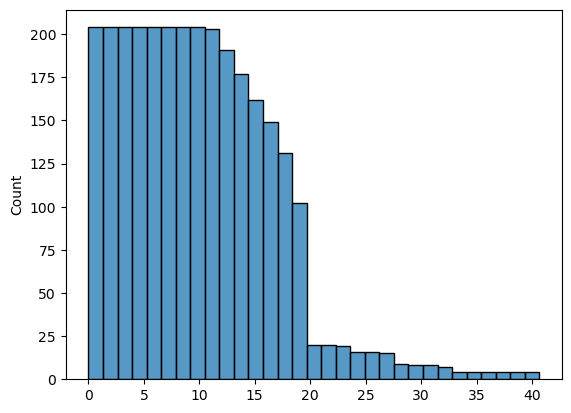

In [25]:
sns.histplot(np.concatenate([df['Time'] for df in wt_time_dataframes]))
plt.savefig('timepoint_distribution_wt.png', dpi=300, facecolor="white")

/var/folders/6y/yr56t1v91h9818gvrszln1bh0000gn/T/ipykernel_38055/339267439.py:24: RuntimeWarning: Mean of empty slice
  mean_lengths[t] = np.nanmean(spindle_lengths)
/var/folders/6y/yr56t1v91h9818gvrszln1bh0000gn/T/ipykernel_38055/339267439.py:25: RuntimeWarning: Degrees of freedom <= 0 for slice.
  variance_lengths[t] = np.nanvar(spindle_lengths)
/var/folders/6y/yr56t1v91h9818gvrszln1bh0000gn/T/ipykernel_38055/339267439.py:29: RuntimeWarning: Mean of empty slice
  mean_dispersion.append(np.nanmean(spindle_dispersion))
/var/folders/6y/yr56t1v91h9818gvrszln1bh0000gn/T/ipykernel_38055/339267439.py:30: RuntimeWarning: Degrees of freedom <= 0 for slice.
  variance_dispersion.append(np.nanvar(spindle_dispersion))
/var/folders/6y/yr56t1v91h9818gvrszln1bh0000gn/T/ipykernel_38055/339267439.py:36: RuntimeWarning: Mean of empty slice
  mean_separation.append(np.nanmean(separation))
/var/folders/6y/yr56t1v91h9818gvrszln1bh0000gn/T/ipykernel_38055/339267439.py:37: RuntimeWarning: Degrees of freedo

[       nan 0.97877827 1.01515379 1.02108991 1.0421452  1.06169783
 1.07517353 1.08506524 1.09760959 1.12748    1.15075461 1.15753267
 1.16700356 1.17353261 1.17999648 1.17847367 1.18200052 1.17941195
 1.17657156 1.16716819 1.18192749 1.19278285 1.20285943 1.21521637
 1.23066252 1.24865456 1.25876475 1.26639752 1.27796356 1.28176833
 1.28176889 1.28234513 1.30177358 1.3181212  1.31259703 1.32517764
 1.34062004 1.36676602 1.38057389 1.4112214  1.41727132 1.40926465
 1.40564198 1.43277571 1.44108626 1.42500065 1.44910985 1.44680621
 1.45383564 1.46594863 1.42123254 1.42296783 1.43314511 1.45703082
 1.47337764 1.49275351 1.44988614 1.47476583 1.51346585 1.5523867 ]


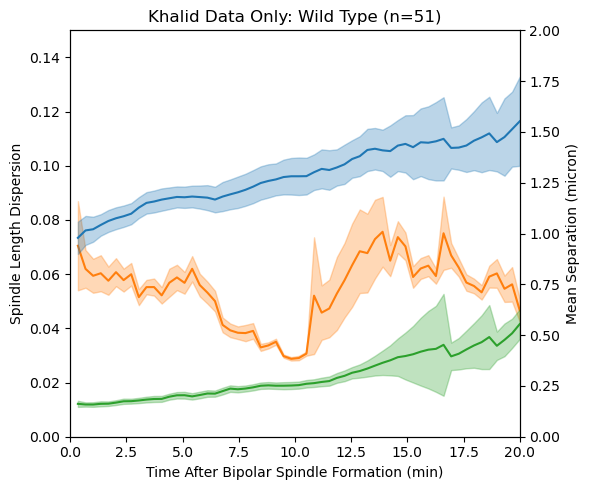

In [28]:
plt.figure(dpi=100, figsize=(6,5))

ax1 = plt.gca()
ax2 = ax1.twinx()
ts = np.linspace(0, 20, 60)

mean_lengths = np.zeros(60)
variance_lengths = np.zeros(60)
mean_dispersion = [] 
variance_dispersion = [] 
mean_separation = [] 
variance_separation = [] 
for t in range(60): 
    spindle_lengths = []
    spindle_dispersion = []
    separation = []
    for df in wt_time_dataframes: 
        if len(df.index) > t: 
            spindle_lengths.append(df['Mean Spindle Length'].iloc[t])
            spindle_dispersion.append(df['Dispersion Spindle Length'].iloc[t])
            separation.append(df['Mean Centromere Separation'].iloc[t])
            
    
    mean_lengths[t] = np.nanmean(spindle_lengths)
    variance_lengths[t] = np.nanvar(spindle_lengths)
    
    
    if len(spindle_dispersion) > 0: 
        mean_dispersion.append(np.nanmean(spindle_dispersion))
        variance_dispersion.append(np.nanvar(spindle_dispersion))
    else: 
        mean_dispersion.append(np.nan)
        variance_dispersion.append(np.nan)
    
    if len(separation) > 0: 
        mean_separation.append(np.nanmean(separation))
        variance_separation.append(np.nanvar(separation))
    else: 
        mean_separation.append(np.nan)
        variance_separation.append(np.nan)

mean_dispersion = np.array(mean_dispersion)      
variance_dispersion = np.array(variance_dispersion)
mean_separation = np.array(mean_separation)      
variance_separation = np.array(variance_separation)

shadow_alpha = 0.3

ax2.plot(ts, mean_lengths, color=sns.color_palette()[0])
ax2.fill_between(ts, mean_lengths + variance_lengths, mean_lengths - variance_lengths, color=sns.color_palette()[0], alpha=shadow_alpha)

ax1.plot(ts, mean_dispersion, color=sns.color_palette()[1])
ax1.fill_between(ts, mean_dispersion + variance_dispersion, mean_dispersion - variance_dispersion, color=sns.color_palette()[1], alpha=shadow_alpha)

ax2.plot(ts, mean_separation, color=sns.color_palette()[2])
ax2.fill_between(ts, mean_separation + variance_separation, mean_separation - variance_separation, color=sns.color_palette()[2], alpha=shadow_alpha)

ax2.set_ylim(0, 2)
ax1.set_ylim(0, 0.15)
plt.xlim(0, 20)

ax1.set_ylabel('Spindle Length Dispersion')
ax2.set_ylabel('Mean Separation (micron)')
ax1.set_xlabel('Time After Bipolar Spindle Formation (min)')

plt.title(f'Khalid Data Only: Wild Type (n={len(wt_time_dataframes)})')
plt.tight_layout()
plt.savefig('khalid_time_wt_with_lengt_lineplot.png', dpi=300, facecolor="white")
plt.savefig('khalid_time_wt_with_length_lineplot.svg', dpi=300, facecolor="white")

print(mean_lengths)

In [29]:
asc17a_Y445D_time_dataframes = [] 
for df in ase17a_tub4_Y445D_dataframes:
    # Establish the start point. 
    start = 0
    spindle_length = np.array(df['Spindle Length'])
    centromere_separation = np.array(df['Centromere Separation'])
    while np.isnan(spindle_length)[start]: 
        start += 1 
    
    df = pd.DataFrame({
        'Spindle Length': spindle_length[start:],
        'Centromere Separation': centromere_separation[start:]
    })
    
    df['Mean Centromere Separation'] = df['Centromere Separation'].rolling(window=WINDOW_SIZE, min_periods=2).mean()
    df['Variance Centromere Separation'] = df['Centromere Separation'].rolling(window=WINDOW_SIZE, min_periods=2).var()
    df['Mean Spindle Length'] = df['Spindle Length'].rolling(window=WINDOW_SIZE, min_periods=2).mean()
    df['Variance Spindle Length'] = df['Spindle Length'].rolling(window=WINDOW_SIZE, min_periods=2).var()
    df['Dispersion Spindle Length'] = df['Variance Spindle Length'] / df['Mean Spindle Length']
    
    df['Time'] = np.array(df.index) * 20.0 / 60.0 # Minutes
    
    asc17a_Y445D_time_dataframes.append(df)

/var/folders/6y/yr56t1v91h9818gvrszln1bh0000gn/T/ipykernel_38055/407231315.py:24: RuntimeWarning: Mean of empty slice
  mean_lengths.append(np.nanmean(spindle_lengths))
/var/folders/6y/yr56t1v91h9818gvrszln1bh0000gn/T/ipykernel_38055/407231315.py:25: RuntimeWarning: Degrees of freedom <= 0 for slice.
  variance_lengths.append(np.nanvar(spindle_lengths))
/var/folders/6y/yr56t1v91h9818gvrszln1bh0000gn/T/ipykernel_38055/407231315.py:31: RuntimeWarning: Mean of empty slice
  mean_dispersion.append(np.nanmean(spindle_dispersion))
/var/folders/6y/yr56t1v91h9818gvrszln1bh0000gn/T/ipykernel_38055/407231315.py:32: RuntimeWarning: Degrees of freedom <= 0 for slice.
  variance_dispersion.append(np.nanvar(spindle_dispersion))
/var/folders/6y/yr56t1v91h9818gvrszln1bh0000gn/T/ipykernel_38055/407231315.py:38: RuntimeWarning: Mean of empty slice
  mean_separation.append(np.nanmean(separation))
/var/folders/6y/yr56t1v91h9818gvrszln1bh0000gn/T/ipykernel_38055/407231315.py:39: RuntimeWarning: Degrees of 

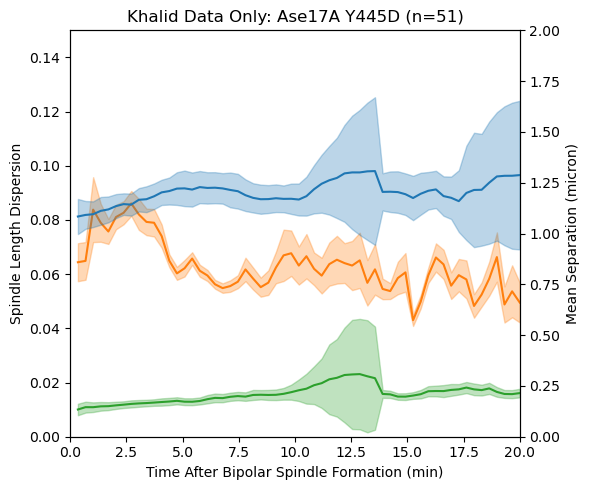

In [31]:
plt.figure(dpi=100, figsize=(6,5))

ax1 = plt.gca()
ax2 = ax1.twinx()
ts = np.linspace(0, 20, 60)

mean_lengths = [] 
variance_lengths = []
mean_dispersion = [] 
variance_dispersion = [] 
mean_separation = [] 
variance_separation = [] 
for t in range(60): 
    spindle_lengths = []
    spindle_dispersion = []
    separation = []
    for df in asc17a_Y445D_time_dataframes: 
        if len(df.index) > t: 
            spindle_lengths.append(df['Mean Spindle Length'].iloc[t])
            spindle_dispersion.append(df['Dispersion Spindle Length'].iloc[t])
            separation.append(df['Mean Centromere Separation'].iloc[t])
            
    if len(spindle_lengths) > 0: 
        mean_lengths.append(np.nanmean(spindle_lengths))
        variance_lengths.append(np.nanvar(spindle_lengths))
    else: 
        mean_lengths.append(np.nan)
        variance_lengths.append(np.nan)
    
    if len(spindle_dispersion) > 0: 
        mean_dispersion.append(np.nanmean(spindle_dispersion))
        variance_dispersion.append(np.nanvar(spindle_dispersion))
    else: 
        mean_dispersion.append(np.nan)
        variance_dispersion.append(np.nan)
    
    if len(separation) > 0: 
        mean_separation.append(np.nanmean(separation))
        variance_separation.append(np.nanvar(separation))
    else: 
        mean_separation.append(np.nan)
        variance_separation.append(np.nan)

mean_lengths = np.array(mean_lengths)      
variance_lengths = np.array(variance_lengths)
mean_dispersion = np.array(mean_dispersion)      
variance_dispersion = np.array(variance_dispersion)
mean_separation = np.array(mean_separation)      
variance_separation = np.array(variance_separation)

shadow_alpha = 0.3

ax2.plot(ts, mean_lengths, color=sns.color_palette()[0])
ax2.fill_between(ts, mean_lengths + variance_lengths, mean_lengths - variance_lengths, color=sns.color_palette()[0], alpha=shadow_alpha)

ax1.plot(ts, mean_dispersion, color=sns.color_palette()[1])
ax1.fill_between(ts, mean_dispersion + variance_dispersion, mean_dispersion - variance_dispersion, color=sns.color_palette()[1], alpha=shadow_alpha)

ax2.plot(ts, mean_separation, color=sns.color_palette()[2])
ax2.fill_between(ts, mean_separation + variance_separation, mean_separation - variance_separation, color=sns.color_palette()[2], alpha=shadow_alpha)

ax2.set_ylim(0, 2)
ax1.set_ylim(0, 0.15)
plt.xlim(0, 20)

ax1.set_ylabel('Spindle Length Dispersion')
ax2.set_ylabel('Mean Separation (micron)')
ax1.set_xlabel('Time After Bipolar Spindle Formation (min)')

plt.title(f'Khalid Data Only: Ase17A Y445D (n={len(asc17a_Y445D_time_dataframes)})')
plt.tight_layout()
plt.savefig('khalid_time_ase17A_Y445D_with_lengt_lineplot.png', dpi=300, facecolor="white")
plt.savefig('khalid_time_ase17A_Y445D_with_length_lineplot.svg', dpi=300, facecolor="white")

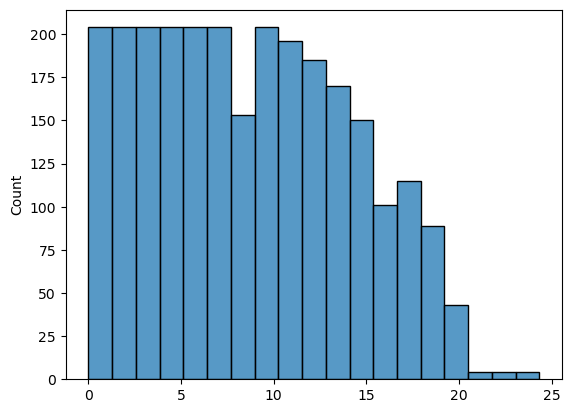

In [32]:
sns.histplot(np.concatenate([df['Time'] for df in asc17a_Y445D_time_dataframes]))
plt.savefig('timepoint_distribution_ase17a_Y445D.png', dpi=300, facecolor="white")